# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [55]:
df = pd.read_csv('Dataset_clustering.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


src : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
Dataset ini memberikan gambaran terperinci mengenai perilaku transaksional dan pola aktivitas keuangan, yang ideal untuk mengeksplorasi deteksi penipuan dan identifikasi anomali. Dataset ini berisi 2.512 sampel data transaksi, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri menawarkan wawasan yang komprehensif tentang perilaku transaksi, memungkinkan analisis untuk aplikasi keamanan keuangan dan deteksi penipuan.

Fitur Utama:

- TransactionID: Pengidentifikasi alfanumerik unik untuk setiap transaksi.
- AccountID: Pengidentifikasi unik untuk setiap akun, dengan beberapa transaksi per akun.
- TransactionAmount: Nilai moneter dari setiap transaksi, mulai dari pengeluaran harian yang kecil hingga pembelian yang lebih besar.
- TransactionDate: Stempel waktu dari setiap transaksi, mencatat tanggal dan waktu.
- TransactionType: Kolom kategorikal yang menunjukkan transaksi 'Kredit' atau 'Debit'.
- Location: Lokasi geografis transaksi, diwakili oleh nama kota di Amerika Serikat.
- DeviceID: Pengenal alfanumerik untuk perangkat yang digunakan untuk melakukan transaksi.
- IP Address : Alamat IPv4 yang terkait dengan transaksi, dengan perubahan sesekali untuk beberapa akun.
- MerchantID: Pengenal unik untuk merchant, yang menunjukkan merchant yang disukai dan yang tidak disukai untuk setiap akun.
- AccountBalance: Saldo di akun setelah transaksi, dengan korelasi logis berdasarkan jenis dan jumlah transaksi.
- Previous Transaction Date: Stempel waktu dari transaksi terakhir untuk akun, membantu dalam menghitung frekuensi transaksi.
- Channel: Saluran yang digunakan untuk melakukan transaksi (misal: Online, ATM, Cabang).
- CustomerAge: Usia pemegang rekening, dengan pengelompokan logis berdasarkan pekerjaan.
- CustomerOccupation: Pekerjaan pemilik rekening (misal: Dokter, Insinyur, Mahasiswa, Pensiunan), yang mencerminkan pola pendapatan.
- TransactionDuration: Durasi transaksi dalam hitungan detik, bervariasi berdasarkan jenis transaksi.
- LoginAttempts: Jumlah percobaan login sebelum transaksi, dengan nilai yang lebih tinggi mengindikasikan potensi anomali.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [57]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

- Jumlah Baris dan Kolom:
Dataset ini memiliki 2.512 entri dan 16 kolom.

- Jenis Data Kolom:
    - Kolom numerikal (dengan tipe data float64 atau int64):
        TransactionAmount (float64), CustomerAge (int64), TransactionDuration (int64), LoginAttempts (int64), AccountBalance (float64)
        
    - Kolom kategorikal (dengan tipe data object):
        TransactionID, AccountID, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, PreviousTransactionDate

- Dari informasi yang diberikan, terlihat bahwa semua kolom memiliki 2512 nilai non-null, yang berarti tidak ada data yang hilang di setiap kolom. Dengan demikian, tidak ada langkah yang diperlukan untuk menangani data yang hilang.

In [58]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


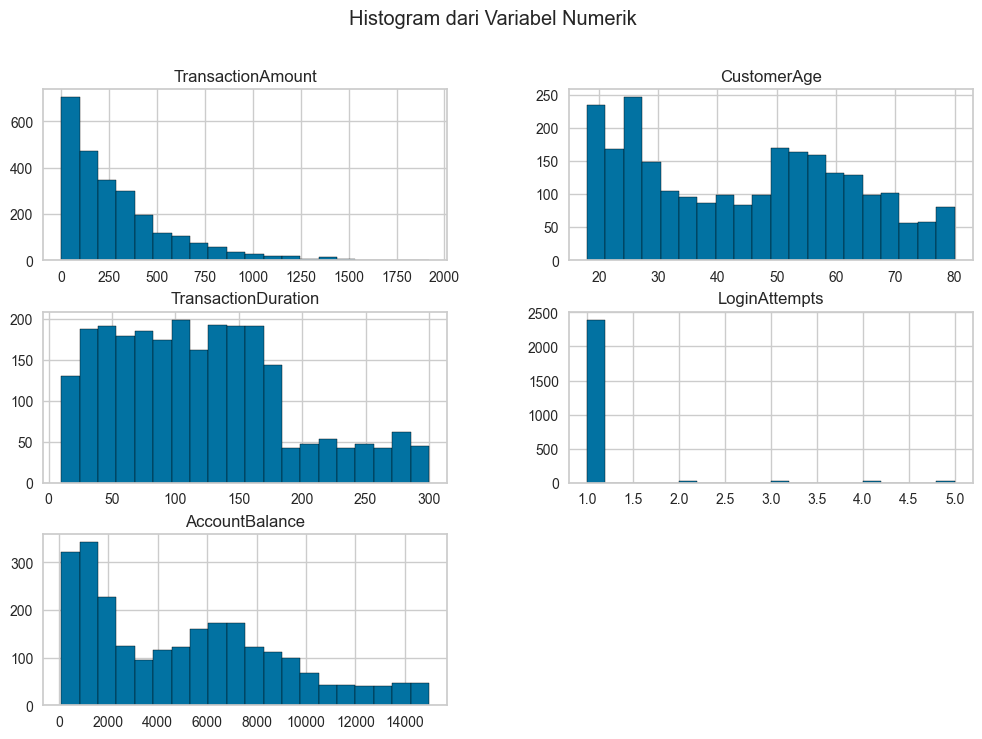

In [59]:
# Visualisasi Histogram untuk setiap variabel numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[numerical_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histogram dari Variabel Numerik')
plt.show()

- TransactionAmount dan AccountBalance menunjukkan adanya ketidakseimbangan yang jelas, dengan beberapa nilai yang jauh lebih besar daripada yang lainnya, menunjukkan adanya pelanggan dengan transaksi atau saldo yang jauh di atas rata-rata.

- Variabel seperti LoginAttempts memiliki distribusi yang sangat terpusat pada nilai rendah (1 kali), sedangkan variabel seperti 
TransactionDuration dan CustomerAge memiliki distribusi yang lebih merata dengan rentang yang lebih luas.

In [60]:
# Statistik Frekuensi untuk Variabel Kategorikal
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

# Melihat frekuensi untuk setiap variabel kategorikal
print("Frekuensi untuk Variabel Kategorikal:")
for col in categorical_cols:
    print(f"\nFrekuensi untuk {col}:")
    print(df[col].value_counts())

Frekuensi untuk Variabel Kategorikal:

Frekuensi untuk TransactionType:
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

Frekuensi untuk Channel:
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

Frekuensi untuk CustomerOccupation:
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64


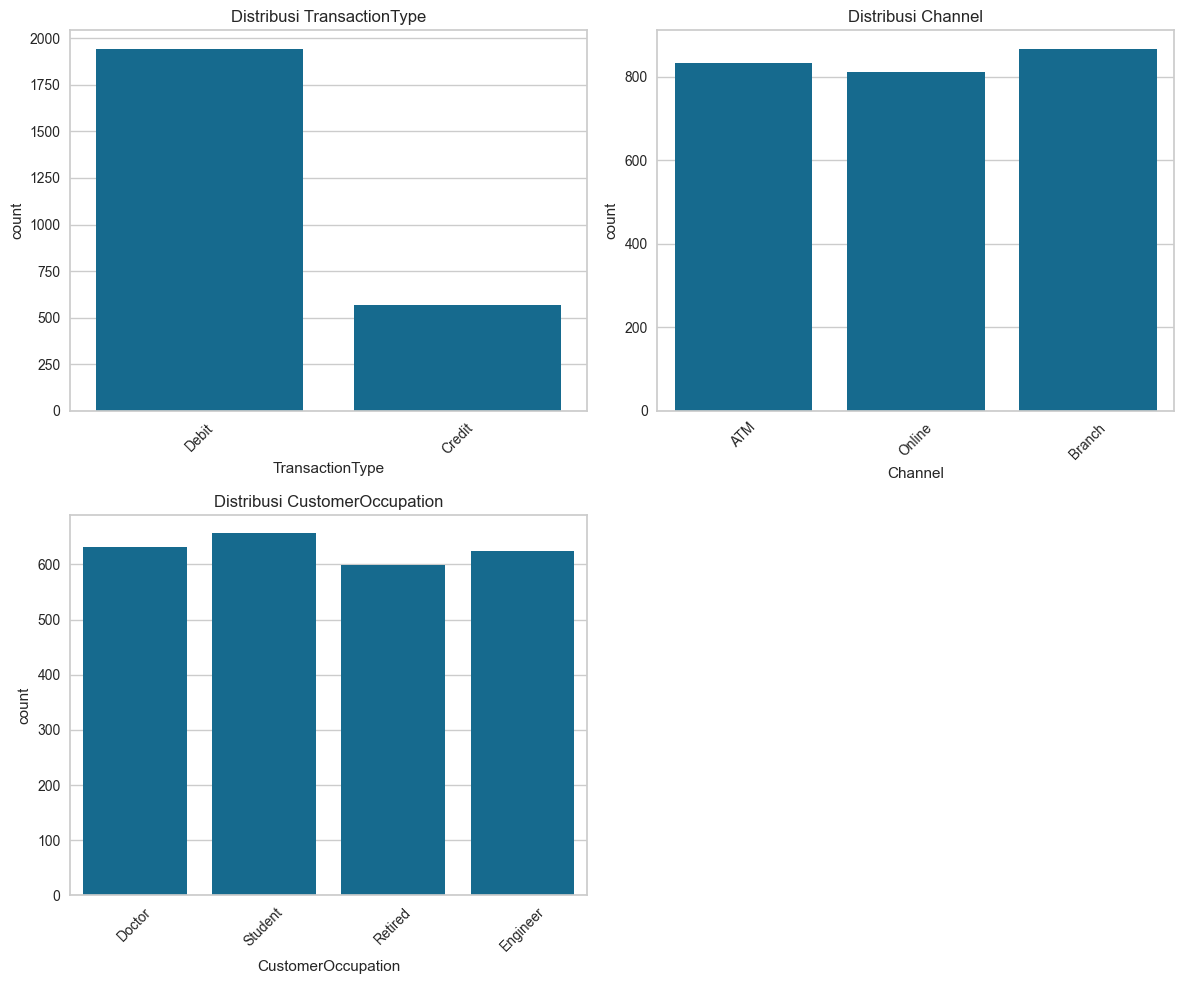

In [61]:
# Membuat visualisasi bar plot untuk setiap kolom kategorikal
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- TransactionType menunjukkan preferensi yang jelas untuk debit.

- Channel menunjukkan distribusi transaksi yang hampir seimbang, namun branch masih sedikit lebih dominan.

- CustomerOccupation menunjukkan bahwa produk dan layanan lebih tersebar merata di antara profesi yang berbeda, dengan sedikit kecenderungan pada kalangan mahasiswa.

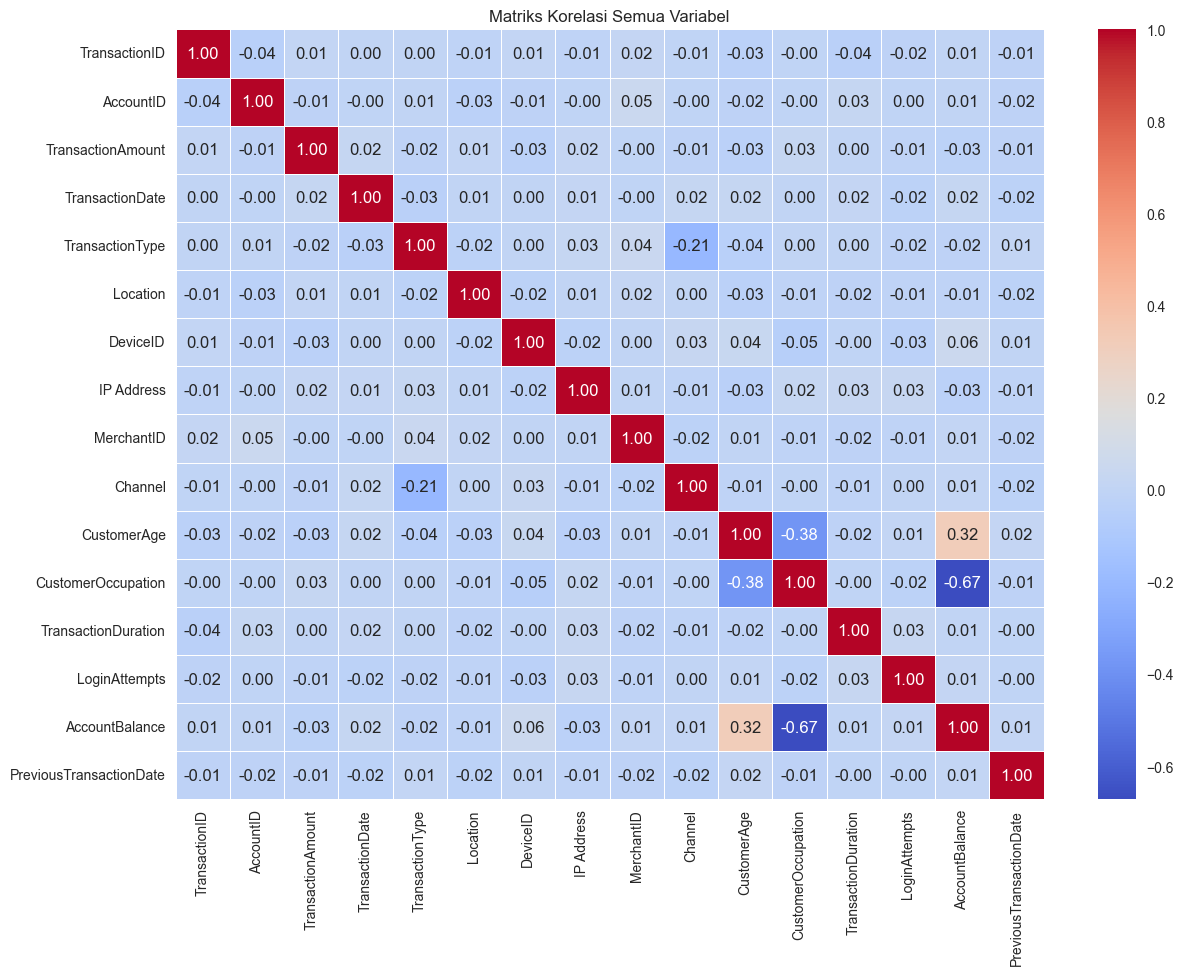

In [62]:
# Analisis Korelasi
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Semua Variabel')
plt.show()

In [63]:
df['CustomerOccupation'].value_counts()

CustomerOccupation
3    657
0    631
1    625
2    599
Name: count, dtype: int64

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Encoding Data Kategorikal
4. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [64]:
#Sebelumnya telah di cek data kosong dan tidak ada data yang null, selanjutnya cek data duplikat
df.duplicated().sum()

0

Tidak ada baris yang duplikat dalam DataFrame

In [65]:
# Menentukan bins untuk usia
bins = [18, 40, 60, 80]
labels = ['18-40', '41-60', '61-80']

df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

df[['TransactionID', 'CustomerAge', 'AgeGroup']]

,TransactionID,CustomerAge,AgeGroup
0,0,70,61-80
1,1,68,61-80
2,2,19,18-40
3,3,26,18-40
4,4,26,18-40
...,...,...,...
2507,2507,33,18-40
2508,2508,48,41-60
2509,2509,56,41-60
2510,2510,23,18-40


In [66]:
df['AgeGroup'].value_counts()

AgeGroup
18-40    1082
41-60     819
61-80     594
Name: count, dtype: int64

Data pelanggan dikelompokkan ke dalam tiga kategori usia, yaitu 18-40, 41-60, 61-80

In [67]:
df = df[['TransactionAmount', 'AgeGroup', 'CustomerOccupation', 'TransactionDuration', 'AccountBalance']]
df

,TransactionAmount,AgeGroup,CustomerOccupation,TransactionDuration,AccountBalance
0,14.09,61-80,0,81,5112.21
1,376.24,61-80,0,141,13758.91
2,126.29,18-40,3,56,1122.35
3,184.50,18-40,3,25,8569.06
4,13.45,18-40,3,198,7429.40
...,...,...,...,...,...
2507,856.21,18-40,0,109,12690.79
2508,251.54,41-60,0,177,254.75
2509,28.63,41-60,2,146,3382.91
2510,185.97,18-40,3,19,1776.91


In [68]:
# Encoding Data Kategorikal
encoder = LabelEncoder()
df['AgeGroup'] = encoder.fit_transform(df['AgeGroup'])

df

C:\Users\naufa\AppData\Local\Temp\ipykernel_8304\342805220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = encoder.fit_transform(df['AgeGroup'])


,TransactionAmount,AgeGroup,CustomerOccupation,TransactionDuration,AccountBalance
0,14.09,2,0,81,5112.21
1,376.24,2,0,141,13758.91
2,126.29,0,3,56,1122.35
3,184.50,0,3,25,8569.06
4,13.45,0,3,198,7429.40
...,...,...,...,...,...
2507,856.21,0,0,109,12690.79
2508,251.54,1,0,177,254.75
2509,28.63,1,2,146,3382.91
2510,185.97,0,3,19,1776.91


In [69]:
df['AgeGroup'].value_counts()

AgeGroup
0    1082
1     819
2     594
3      17
Name: count, dtype: int64

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [70]:
# Menentukan jumlah cluster optimal dengan metode elbow
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

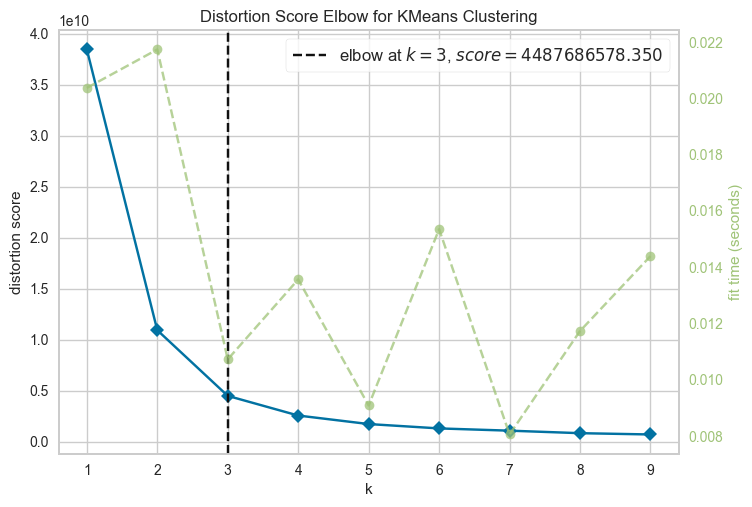

Silhouette Score: 0.4613


In [71]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

Hasil analisis menggunakan metode elbow menunjukkan bahwa jumlah cluster yang optimal adalah 3, dengan nilai total within-cluster sum of squares (WCSS) sebesar 4487686578.350. Ini berarti bahwa membagi data menjadi 3 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\naufa\AppData\Local\Temp\ipykernel_8304\1724508308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans_labels


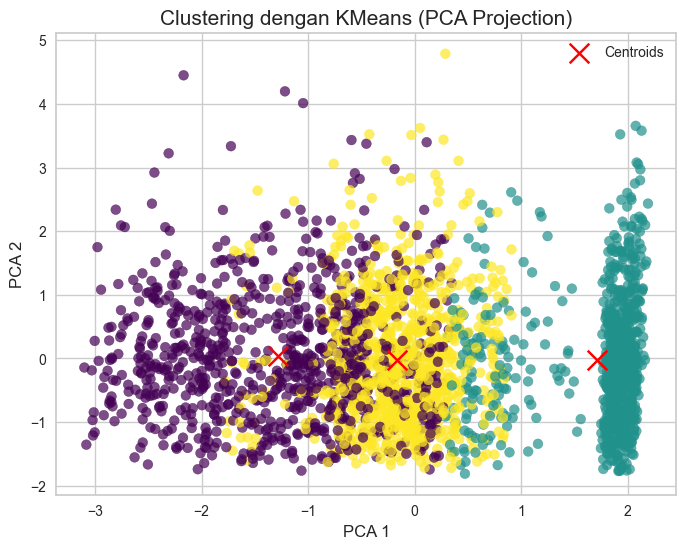

In [72]:
# Penerapan KMeans clustering dengan k=3 (dari hasil Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = kmeans_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.7)

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('Clustering dengan KMeans (PCA Projection)', fontsize=15)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [73]:
df

,TransactionAmount,AgeGroup,CustomerOccupation,TransactionDuration,AccountBalance,Cluster
0,14.09,2,0,81,5112.21,2
1,376.24,2,0,141,13758.91,0
2,126.29,0,3,56,1122.35,1
3,184.50,0,3,25,8569.06,1
4,13.45,0,3,198,7429.40,1
...,...,...,...,...,...,...
2507,856.21,0,0,109,12690.79,0
2508,251.54,1,0,177,254.75,2
2509,28.63,1,2,146,3382.91,2
2510,185.97,0,3,19,1776.91,1


In [74]:
# Mapping for CustomerOccupation and AgeGroup
occupation_map = {0: 'Doctor', 1: 'Engineer', 2: 'Retired', 3: 'Student'}
age_group_map = {0: '18-40', 1: '41-60', 2: '61-80'}

df['CustomerOccupation'] = df['CustomerOccupation'].map(occupation_map)
df['AgeGroup'] = df['AgeGroup'].map(age_group_map)
df

C:\Users\naufa\AppData\Local\Temp\ipykernel_8304\2528943194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerOccupation'] = df['CustomerOccupation'].map(occupation_map)
C:\Users\naufa\AppData\Local\Temp\ipykernel_8304\2528943194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = df['AgeGroup'].map(age_group_map)


,TransactionAmount,AgeGroup,CustomerOccupation,TransactionDuration,AccountBalance,Cluster
0,14.09,61-80,Doctor,81,5112.21,2
1,376.24,61-80,Doctor,141,13758.91,0
2,126.29,18-40,Student,56,1122.35,1
3,184.50,18-40,Student,25,8569.06,1
4,13.45,18-40,Student,198,7429.40,1
...,...,...,...,...,...,...
2507,856.21,18-40,Doctor,109,12690.79,0
2508,251.54,41-60,Doctor,177,254.75,2
2509,28.63,41-60,Retired,146,3382.91,2
2510,185.97,18-40,Student,19,1776.91,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [75]:
# Agregasi numerik
numeric_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance']
numeric_agg = df.groupby('Cluster')[numeric_columns].agg(['min', 'max', 'mean'])

# Agregasi kategorikal
categorical_columns = ['AgeGroup', 'CustomerOccupation']
categorical_agg = df.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

In [76]:
numeric_agg

TransactionAmount                      TransactionDuration       \
                      min      max        mean                 min  max   
Cluster                                                                   
0                    0.32  1919.11  284.313341                  10  300   
1                    0.26  1762.28  311.189636                  10  299   
2                    0.84  1830.00  299.252367                  10  300   

                    AccountBalance                         
               mean            min       max         mean  
Cluster                                                    
0        123.748565         354.90  14977.99  9141.734581  
1        119.267206         101.25   9963.39  1641.292173  
2        115.980000         120.89   9877.17  4076.089700

In [77]:
categorical_agg

,AgeGroup,CustomerOccupation
Cluster,,
0,41-60,Doctor
1,18-40,Student
2,61-80,Retired


Klaster 0 didapatkan karena:
- Variabel TransactionAmount memiliki nilai rata-rata 284.31 dengan batas minimum 0.32 dan batas maksimum 1919.11.
- Variabel TransactionDuration memiliki nilai rata-rata 123.75 dengan batas minimum 10 dan batas maksimum 300.
- Variabel AccountBalance memiliki nilai rata-rata 9141.73 dengan batas minimum 354.90 dan batas maksimum 14977.99.
- AgeGroup memiliki nilai modus kategori 41-60, yang menunjukkan bahwa sebagian besar pelanggan di klaster ini termasuk dalam kelompok usia 41 hingga 60 tahun.
- CustomerOccupation memiliki nilai modus kategori Doctor, yang menunjukkan bahwa mayoritas pelanggan dalam klaster ini berprofesi sebagai dokter.

Klaster 1 didapatkan karena:
- Variabel TransactionAmount memiliki nilai rata-rata 311.19 dengan batas minimum 0.26 dan batas maksimum 1762.28.
- Variabel TransactionDuration memiliki nilai rata-rata 119.27 dengan batas minimum 10 dan batas maksimum 299.
- Variabel AccountBalance memiliki nilai rata-rata 1641.29 dengan batas minimum 101.25 dan batas maksimum 9963.39.
- AgeGroup memiliki nilai modus kategori 18-40, yang menunjukkan bahwa sebagian besar pelanggan di klaster ini termasuk dalam kelompok usia 18 hingga 40 tahun.
- CustomerOccupation memiliki nilai modus kategori Student, yang menunjukkan bahwa mayoritas pelanggan dalam klaster ini berstatus sebagai pelajar atau mahasiswa.

Klaster 2 didapatkan karena:
- Variabel TransactionAmount memiliki nilai rata-rata 299.25 dengan batas minimum 0.84 dan batas maksimum 1830.00.
- Variabel TransactionDuration memiliki nilai rata-rata 115.98 dengan batas minimum 10 dan batas maksimum 300.
- Variabel AccountBalance memiliki nilai rata-rata 4076.09 dengan batas minimum 120.89 dan batas maksimum 9877.17.
- AgeGroup memiliki nilai modus kategori 61-80, yang menunjukkan bahwa sebagian besar pelanggan di klaster ini termasuk dalam kelompok usia 61 hingga 80 tahun.
- CustomerOccupation memiliki nilai modus kategori Retired, yang menunjukkan bahwa mayoritas pelanggan dalam klaster ini sudah memasuki masa pensiun.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [78]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('Dataset_inisiasi.csv', index=False)